In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import nengo
%load_ext nengo.ipynb

<IPython.core.display.Javascript object>

In [2]:
from nengo.dists import Uniform

model = nengo.Network(label='A Single Neuron')
with model:
    neuron = nengo.Ensemble(1, dimensions=1, # Represent a scalar
                            intercepts=Uniform(-.5, -.5),  # Set intercept to 0.5
                            max_rates=Uniform(100, 100),  # Set the maximum firing rate of the neuron to 100hz
                            encoders=[[1]])  # Sets the neurons firing rate to increase for positive input

In [3]:
with model:
    cos = nengo.Node(lambda t: np.cos(8 * t))

In [4]:
with model:
    # Connect the input signal to the neuron
    nengo.Connection(cos, neuron)

In [5]:
with model:
    cos_probe = nengo.Probe(cos)  # The original input
    spikes = nengo.Probe(neuron.neurons)  # The raw spikes from the neuron
    voltage = nengo.Probe(neuron.neurons, 'voltage')  # Subthreshold soma voltage of the neuron
    filtered = nengo.Probe(neuron, synapse=0.01) # Spikes filtered by a 10ms post-synaptic filter

In [6]:
with nengo.Simulator(model) as sim: # Create the simulator
    sim.run(1) # Run it for 1 second

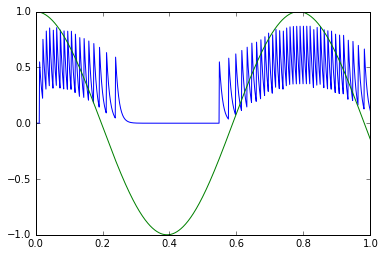

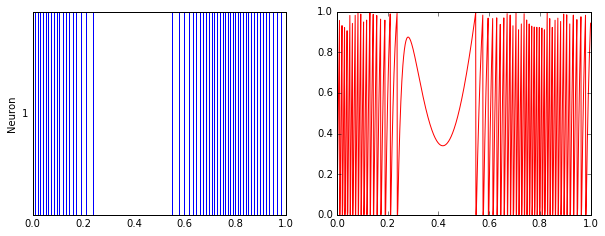

In [7]:
# Plot the decoded output of the ensemble
plt.plot(sim.trange(), sim.data[filtered])
plt.plot(sim.trange(), sim.data[cos_probe])
plt.xlim(0, 1)

# Plot the spiking output of the ensemble
from nengo.utils.matplotlib import rasterplot
plt.figure(figsize=(10, 8))
plt.subplot(221)
rasterplot(sim.trange(), sim.data[spikes])
plt.ylabel("Neuron")
plt.xlim(0, 1)

# Plot the soma voltages of the neurons
plt.subplot(222)
plt.plot(sim.trange(), sim.data[voltage][:,0], 'r')
plt.xlim(0, 1);